<div class="alert alert-info" style="box-shadow: 4px 4px 4px">Задание:

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Необходимо определить рыночную стоимость объектов недвижимости. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.</div>



Шаг 1. Откройте файл с данными и изучите общую информацию
Путь к файлу: /datasets/real_estate_data.csv. Скачать датасет

Шаг 2. Предобработка данных
Определите и изучите пропущенные значения:

Для некоторых пропущенных значений можно предположить логичную замену. Например, если человек не указал число балконов — скорее всего, их нет. Такие пропуски правильно заменить на 0. Для других типов данных нет подходящего значения на замену. В этом случае правильно оставить эти значения пустыми. Отсутствие значения — тоже важный сигнал, который не нужно прятать.
Заполните пропуски, где это уместно. Опишите, почему вы решили заполнить пропуски именно в этих столбцах и как выбрали значения.

Укажите причины, которые могли привести к пропускам в данных.

Приведите данные к нужным типам:

Поясните, в каких столбцах нужно изменить тип данных и почему.


Описание данных

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

Пояснение: апартаменты — это нежилые помещения, которые не относятся к жилому фонду, но имеют необходимые условия для проживания.

Загружаем библиотеки, устанавливаем настройку для таблицы, загружаем файл.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
try:
    df = pd.read_csv(r'C:\Users\Иванов\real_estate_data.csv',sep='\t')
except:
    df = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')
    

Смотрим, видим разделитель. Убираем 'sep'-ом

In [4]:
display(df.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [6]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Проверяем столбцы на пропуски данных и тип данных:

* total_images — число фотографий квартиры в объявлении

Пропусков нет. Тип данных соответствует.

* last_price — цена на момент снятия с публикации

Пропусков нет. Тип данных соответствует. Минимальный прайс слишком минимальный. Запомним.

* total_area — площадь квартиры в квадратных метрах (м²)

Пропусков нет. Тип данных соответствует.

* first_day_exposition — дата публикации

Пропусков нет. Меняем тип данных. Округляем до даты.

In [7]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

* rooms — число комнат

Пропусков нет. Тип данных соответствует. Есть нулевые значения. С ними разберемся далее.

* ceiling_height — высота потолков (м)

Тип данных соответствует. 39% пропусков. Заполнять медианным значением не будем, т.к. это может помешать дальнейшему анализу.

* floors_total — всего этажей в доме

86 значений пропущено. 0.3%

In [8]:
df[df['floors_total'].isna()].head(10)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.20,2018-10-02,2,NaN,NaN,30.80,4,NaN,False,False,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.10,2016-11-23,1,NaN,NaN,20.75,1,NaN,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.80,2015-08-01,2,NaN,NaN,38.40,12,NaN,False,False,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.60,2017-04-06,3,NaN,NaN,47.10,8,NaN,False,False,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.00,2017-04-22,1,NaN,NaN,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
1930,1,9750000.0,66.77,2016-05-13,2,NaN,NaN,NaN,4,NaN,False,False,NaN,0.0,Санкт-Петербург,39886.0,10660.0,1.0,2276.0,3.0,244.0,90.0
2392,7,5395770.0,53.00,2017-06-29,2,NaN,NaN,29.00,22,NaN,False,False,9.00,0.0,Санкт-Петербург,43074.0,10820.0,0.0,NaN,0.0,NaN,48.0
2846,4,2325000.0,27.80,2016-09-21,1,NaN,NaN,19.40,15,NaN,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,307.0
2952,10,6500000.0,54.30,2019-04-23,1,NaN,NaN,22.20,6,NaN,False,False,12.30,NaN,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
3031,9,6400000.0,56.70,2018-03-27,2,NaN,NaN,32.00,12,NaN,False,False,12.00,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,231.0


Удаляем. Изменяем тип данных.

In [9]:
df = df.dropna(subset = ['floors_total'])
df['floors_total'] = df['floors_total'].astype('int')

* living_area — жилая площадь в квадратных метрах (м²)

Есть пропуски. 7,9%. Жаль, очень важный параметр. Пока оставляем.

* floor — этаж

Пропусков нет. Тип данных соответствует.

* is_apartment — апартаменты (булев тип)

Заменяем пропуски на False. Тип измениться на bool.

In [10]:
df['is_apartment'] = df['is_apartment'].fillna(False)

* studio — квартира-студия (булев тип)

* open_plan — свободная планировка (булев тип)

Вопросов нет.

* kitchen_area — площадь кухни в квадратных метрах (м²)

Есть пропуски. Тип данных соответствует. Оставляем.

* balcony — число балконов

Заменяем пропуски нулевыми значениями. Изменяем тип данных.

In [11]:
df['balcony'] = df['balcony'].fillna(0)
df['balcony'] = df['balcony'].astype('int')

* locality_name — название населённого пункта

Есть пропуски. 0,2%. Удаляем. 

In [12]:
df = df.dropna(subset = ['locality_name'])

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

Смотрим.

In [13]:
df[df['airports_nearest'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10,1,NaN,12,14.40,5,False,False,False,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23,1,NaN,27,15.43,26,False,False,False,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30,2,NaN,5,30.00,5,False,False,False,9.00,0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24,2,2.75,25,30.00,15,False,False,False,11.00,2,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19,1,NaN,9,NaN,2,False,False,False,NaN,0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.80,2017-10-28,2,2.50,5,NaN,1,False,False,False,NaN,0,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
38,10,3150000.0,40.00,2018-03-29,1,2.75,18,16.30,9,False,False,False,11.60,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,103.0
47,17,3600000.0,56.10,2018-10-18,3,NaN,4,42.50,3,False,False,False,5.70,1,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,179.0
60,3,2740000.0,35.00,2018-01-01,1,NaN,12,NaN,8,False,False,False,NaN,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.0
62,0,4800000.0,78.60,2017-09-17,3,2.80,9,48.80,5,False,False,False,11.90,2,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0


Оставляем пропуски. Видимо, данные загружаемые автоматически работают только в пределах города где есть аэропорт.

* cityCenters_nearest — расстояние до центра города (м)

Есть пропуски. Смотрим.

In [14]:
df[df['cityCenters_nearest'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10,1,NaN,12,14.40,5,False,False,False,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23,1,NaN,27,15.43,26,False,False,False,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30,2,NaN,5,30.00,5,False,False,False,9.00,0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24,2,2.75,25,30.00,15,False,False,False,11.00,2,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19,1,NaN,9,NaN,2,False,False,False,NaN,0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.80,2017-10-28,2,2.50,5,NaN,1,False,False,False,NaN,0,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
38,10,3150000.0,40.00,2018-03-29,1,2.75,18,16.30,9,False,False,False,11.60,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,103.0
47,17,3600000.0,56.10,2018-10-18,3,NaN,4,42.50,3,False,False,False,5.70,1,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,179.0
60,3,2740000.0,35.00,2018-01-01,1,NaN,12,NaN,8,False,False,False,NaN,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.0
62,0,4800000.0,78.60,2017-09-17,3,2.80,9,48.80,5,False,False,False,11.90,2,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0


Аналогичная ситуация. Оставляем.

* parks_around3000 — число парков в радиусе 3 км


Есть пропуски. Смотрим.

In [15]:
df[df['parks_around3000'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10,1,NaN,12,14.40,5,False,False,False,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23,1,NaN,27,15.43,26,False,False,False,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30,2,NaN,5,30.00,5,False,False,False,9.00,0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24,2,2.75,25,30.00,15,False,False,False,11.00,2,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19,1,NaN,9,NaN,2,False,False,False,NaN,0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.80,2017-10-28,2,2.50,5,NaN,1,False,False,False,NaN,0,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
38,10,3150000.0,40.00,2018-03-29,1,2.75,18,16.30,9,False,False,False,11.60,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,103.0
47,17,3600000.0,56.10,2018-10-18,3,NaN,4,42.50,3,False,False,False,5.70,1,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,179.0
60,3,2740000.0,35.00,2018-01-01,1,NaN,12,NaN,8,False,False,False,NaN,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.0
62,0,4800000.0,78.60,2017-09-17,3,2.80,9,48.80,5,False,False,False,11.90,2,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0


Аналогичная ситуация.  Заменяем на нулевые значения. Меняем тип данных.

In [16]:
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['parks_around3000'] = df['parks_around3000'].astype('int')

* parks_nearest — расстояние до ближайшего парка (м)

Оставляем как есть. Ни медианные значения, ни нулевые тут не подойдут.

* ponds_around3000 — число водоёмов в радиусе 3 км

Одинаковое количество пропусков с парками. Странно, в СПб и Ленобласти водоёмов очень много. Видимо автоматическая выгрузка считает за водоемы только Финский залив и Ладогу.

In [17]:
df[df['ponds_around3000'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10,1,NaN,12,14.40,5,False,False,False,9.10,0,городской посёлок Янино-1,NaN,NaN,0,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23,1,NaN,27,15.43,26,False,False,False,8.81,0,посёлок Мурино,NaN,NaN,0,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30,2,NaN,5,30.00,5,False,False,False,9.00,0,Сертолово,NaN,NaN,0,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24,2,2.75,25,30.00,15,False,False,False,11.00,2,деревня Кудрово,NaN,NaN,0,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19,1,NaN,9,NaN,2,False,False,False,NaN,0,Коммунар,NaN,NaN,0,NaN,NaN,NaN,63.0
37,10,1990000.0,45.80,2017-10-28,2,2.50,5,NaN,1,False,False,False,NaN,0,поселок городского типа Красный Бор,NaN,NaN,0,NaN,NaN,NaN,196.0
38,10,3150000.0,40.00,2018-03-29,1,2.75,18,16.30,9,False,False,False,11.60,0,посёлок Мурино,NaN,NaN,0,NaN,NaN,NaN,103.0
47,17,3600000.0,56.10,2018-10-18,3,NaN,4,42.50,3,False,False,False,5.70,1,Гатчина,NaN,NaN,0,NaN,NaN,NaN,179.0
60,3,2740000.0,35.00,2018-01-01,1,NaN,12,NaN,8,False,False,False,NaN,0,посёлок Мурино,NaN,NaN,0,NaN,NaN,NaN,11.0
62,0,4800000.0,78.60,2017-09-17,3,2.80,9,48.80,5,False,False,False,11.90,2,Сертолово,NaN,NaN,0,NaN,NaN,NaN,5.0


Смотрим. И опять не Питер. Меняем на нулевые. Меняем тип данных

In [18]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].astype('int')

* ponds_nearest — расстояние до ближайшего водоёма (м)

Оставляем как есть. Ни медианные значения, ни нулевые тут не подойдут.

* days_exposition — сколько дней было размещено объявление (от публикации до снятия)

Есть пропуски. Предположительно связанные с тем, что на момент выгрузки данных объявление еще не снято. Оставляем как есть.

В данном разделе была проведена первоначальная подготовка данных, а именно:

* столбцы были проверены на пропуски. Часть из них заполнены соответствующими значениями, некоторые удалены либо оставлены в первоначальном виде.
* типы данных приведены в соответствие с данными в столбцах.

Разработчикам данного сайта я бы посоветовал сделать больше обязательных полей для заполнения формы. Например название населённого пункта.

Пропуски в данных, полученных автоматически, тоже можно минимизировать поработав над алгоритмом программы.

Шаг 3. Посчитайте и добавьте в таблицу
* цену квадратного метра;
* день недели, месяц и год публикации объявления;
* этаж квартиры; варианты — первый, последний, другой;
* соотношение жилой и общей площади, а также отношение площади кухни к общей.

Считаем. Добавляем.

In [19]:
df['square_meter_price'] = df['last_price'] / df['total_area']

In [20]:
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

In [21]:
def floor_place (i):
    if i['floor']==1:
        return 'первый'
    elif i['floor']==i['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
df['floor_place'] = df.apply(floor_place, axis=1)

In [22]:
df['living_total_area'] = df['living_area'] / df['total_area']
df['kitchen_total_area'] = df['kitchen_area'] / df['total_area']

Проверяем.

In [23]:
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday,month,year,floor_place,living_total_area,kitchen_total_area
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.370370,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.792079,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.714286,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.100629,4,7,2015,другой,NaN,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.000000,1,6,2018,другой,0.320000,0.410000


Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

* Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.
* Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
* Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.
* Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.
* Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.
* Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.
* Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?


Идем по шагам задания, одновременно анализируя и убирая выбросы и аномалии.

In [24]:
df['total_area'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:>

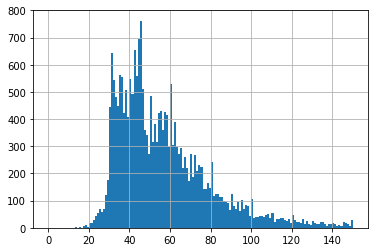

In [25]:
df['total_area'].hist(bins=150, range=(0,150))

(0.0, 550.0)

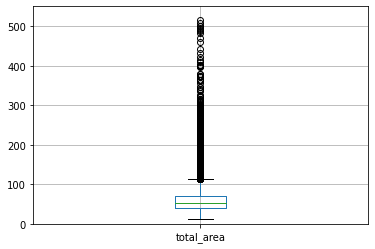

In [26]:
df.boxplot('total_area')
plt.ylim(0, 550)

Минимум 12 метров. Максимум 900 метров. С минимумом согласен. 

[Самая большая квартира в СПб](https://lenta.ru/news/2019/08/15/spb/#:~:text=%D0%9F%D0%BB%D0%BE%D1%89%D0%B0%D0%B4%D1%8C%20%D1%81%D0%B0%D0%BC%D0%BE%D0%B9%20%D0%B1%D0%BE%D0%BB%D1%8C%D1%88%D0%BE%D0%B9%20%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B8%D1%80%D1%8B%20%D0%A1%D0%B0%D0%BD%D0%BA%D1%82,2017%20%D0%B3%D0%BE%D0%B4%D1%83%20%D1%8D%D0%BB%D0%B8%D1%82%D0%BD%D1%8B%D1%85%20%D0%BF%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%D1%81%D0%BA%D0%B8%D1%85%20%D0%96%D0%9A.)

Не будем ориентироваться на самою большую квартиру в СПб, ограничимся элитным жильём в 250 квадратных метра.

In [27]:
df.query('total_area > 250')['total_area'].count()

111

111 квартир. Теряем немного. Режем.

In [28]:
df = df.query('total_area <= 250')

Идем дальше. Цена.

In [29]:
df['last_price'].describe()

count    2.345400e+04
mean     6.191103e+06
std      7.068509e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      3.300000e+08
Name: last_price, dtype: float64

<AxesSubplot:>

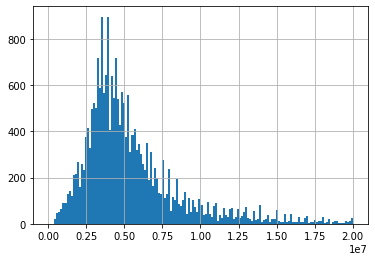

In [30]:
df['last_price'].hist(bins=150, range=(0,20000000))

(200000.0, 100000000.0)

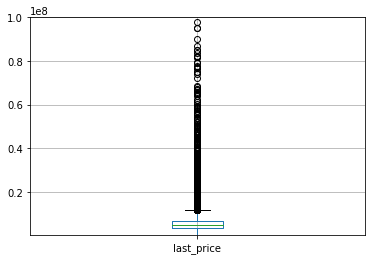

In [31]:
df.boxplot('last_price')
plt.ylim(200000, 100000000)

Минимум 12000 р. Максимум 330000000 р. Режем от 500000 р. до 50000000

In [32]:
df.query('500000 > last_price')['last_price'].count()

14

In [33]:
df.query('50000000 < last_price')['last_price'].count()

76

Их не так много.

In [34]:
df = df.query('50000000 >= last_price >= 500000')

Количество комнат.

In [35]:
df['rooms'].describe()

count    23364.000000
mean         2.046097
std          1.023487
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         14.000000
Name: rooms, dtype: float64

<AxesSubplot:>

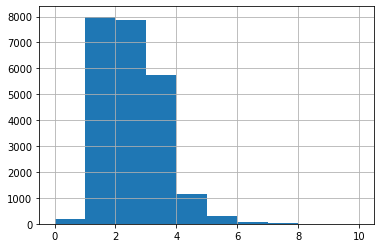

In [36]:
df['rooms'].hist(bins=10, range=(0,10))

In [37]:
df.query('rooms == 0')['rooms'].count()

193

In [38]:
df.query('rooms > 6')['rooms'].count()

50

Есть нулевые значения. Удаляем. Больше 6-и комнат тоже.

In [39]:
df = df.query('rooms != 0')

In [40]:
df = df.query('rooms <= 6')

Высота потолков.

In [41]:
df['ceiling_height'].describe()

count    14239.000000
mean         2.762596
std          1.253042
min          1.000000
25%          2.500000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

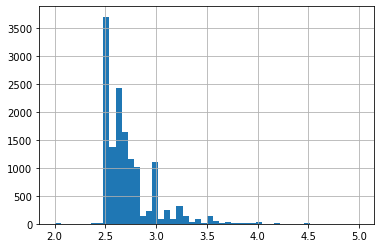

In [42]:
df['ceiling_height'].hist(bins=50, range=(2,5))

Минимум и максимум нереальные. Режем от 2 до 4.

In [43]:
df.query('ceiling_height < 2')['ceiling_height'].count()

3

In [44]:
df.query('ceiling_height > 4')['ceiling_height'].count()

62

Много не теряем.

In [45]:
df = df[(df['ceiling_height'].isna()) | 
    ((4 >= df['ceiling_height']) & (df['ceiling_height'] >= 2)
    )]

Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

In [46]:
df['days_exposition'].describe()

count    19970.000000
mean       180.196044
std        219.005511
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

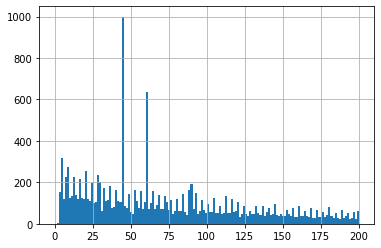

In [47]:
df['days_exposition'].hist(bins=150, range=(0,200))

Медиана = 103, среднее значение = 189.03. Значит есть выбросы. На гистограмме их видно - основные это 45, 60, 90 дней. Есть ещё 7, 30 дней. Возможно, это связано с настройками сайта продаж. К примеру сайт по прошествии 1.5, 2 и 3 месяцев предлагает продавцу снизить цену и/или автоматически поднимает рейтинг объявления. Возможно, что и сам продавец снимает объявление, т.к. у него закончился бесплатный срок публикации.

Максимальное количество дней = 1580, минимальное 1 день. Почему нет. Данные не меняем.

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23056 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23056 non-null  int64         
 1   last_price            23056 non-null  float64       
 2   total_area            23056 non-null  float64       
 3   first_day_exposition  23056 non-null  datetime64[ns]
 4   rooms                 23056 non-null  int64         
 5   ceiling_height        14174 non-null  float64       
 6   floors_total          23056 non-null  int32         
 7   living_area           21237 non-null  float64       
 8   floor                 23056 non-null  int64         
 9   is_apartment          23056 non-null  bool          
 10  studio                23056 non-null  bool          
 11  open_plan             23056 non-null  bool          
 12  kitchen_area          21072 non-null  float64       
 13  balcony         

In [49]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday,month,year,living_total_area,kitchen_total_area
count,23056.000000,2.305600e+04,23056.000000,23056.000000,14174.000000,23056.000000,21237.000000,23056.000000,21072.000000,23056.000000,17642.000000,17662.000000,23056.000000,7803.000000,23056.000000,8764.000000,19970.000000,23056.000000,23056.000000,23056.000000,23056.000000,21237.000000,21072.000000
mean,9.872268,5.921884e+06,58.496973,2.050486,2.714728,10.677481,33.416214,5.871140,10.366996,0.592427,28864.447342,14323.990771,0.461528,491.849801,0.580760,521.446714,180.196044,97453.593679,2.565493,6.394474,2017.373092,0.563509,0.187971
std,5.665898,4.744448e+06,27.144780,0.975546,0.251147,6.574082,17.747695,4.862562,5.265671,0.960577,12692.392697,8609.789235,0.738972,342.535642,0.875598,278.171447,219.005511,39361.950813,1.790007,3.491746,1.036959,0.104166,0.072532
min,0.000000,5.000000e+05,12.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,9615.384615,0.000000,1.000000,2014.000000,0.038462,0.042810
25%,6.000000,3.450000e+06,40.000000,1.000000,2.500000,5.000000,18.600000,2.000000,7.000000,0.000000,18496.000000,9487.000000,0.000000,288.000000,0.000000,298.000000,45.000000,76315.789474,1.000000,3.000000,2017.000000,0.494172,0.133958
50%,9.000000,4.600000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26890.000000,13166.000000,0.000000,455.000000,0.000000,506.000000,95.000000,94712.301749,3.000000,6.000000,2017.000000,0.566667,0.172936
75%,14.000000,6.700000e+06,69.000000,3.000000,2.800000,16.000000,42.000000,8.000000,11.920000,1.000000,37407.000000,16333.000000,1.000000,613.000000,1.000000,733.000000,230.000000,113590.357599,4.000000,10.000000,2018.000000,0.636364,0.232877
max,50.000000,5.000000e+07,250.000000,6.000000,4.000000,60.000000,184.000000,33.000000,75.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,848484.848485,6.000000,12.000000,2019.000000,0.983447,0.787879


 В фильтрованном датасете 23056 строк. В исходном 23699. Удалено 643 строки (2.7%). Считаю это не критичным. Добавилось 7 строк. Медианы и средние некоторых столбцов фильтрованного датасета различаются с значениями исходного, но не на много.

Вывод: датасет отфильтрован правильно.

Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

Выбираем необходимые столбцы для анализа.

In [50]:
df1 = df.loc[:,['last_price', 'total_area', 'rooms', 'cityCenters_nearest', 'weekday', 'month', 'year']]

In [51]:
df1.corr()

,last_price,total_area,rooms,cityCenters_nearest,weekday,month,year
last_price,1.000000,0.772156,0.474857,-0.331274,-0.016764,0.002156,-0.042087
total_area,0.772156,1.000000,0.783800,-0.230216,-0.013836,0.007272,-0.083172
rooms,0.474857,0.783800,1.000000,-0.165178,-0.004849,-0.001301,-0.049792
cityCenters_nearest,-0.331274,-0.230216,-0.165178,1.000000,0.010700,-0.008345,0.025761
weekday,-0.016764,-0.013836,-0.004849,0.010700,1.000000,0.010859,-0.001785
month,0.002156,0.007272,-0.001301,-0.008345,0.010859,1.000000,-0.270112
year,-0.042087,-0.083172,-0.049792,0.025761,-0.001785,-0.270112,1.000000


array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='last_price'>,
        <AxesSubplot:xlabel='weekday', ylabel='last_price'>,
        <AxesSubplot:xlabel='month', ylabel='last_price'>,
        <AxesSubplot:xlabel='year', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='total_area'>,
        <AxesSubplot:xlabel='weekday', ylabel='total_area'>,
        <AxesSubplot:xlabel='month', ylabel='total_area'>,
        <AxesSubplot:xlabel='year', ylabel='total_area'>],
       [<AxesSubplot:xlabel='last_price', ylabel='rooms'>,
        <AxesSubplot:xlabel='total_area', ylabel='rooms'>,
    

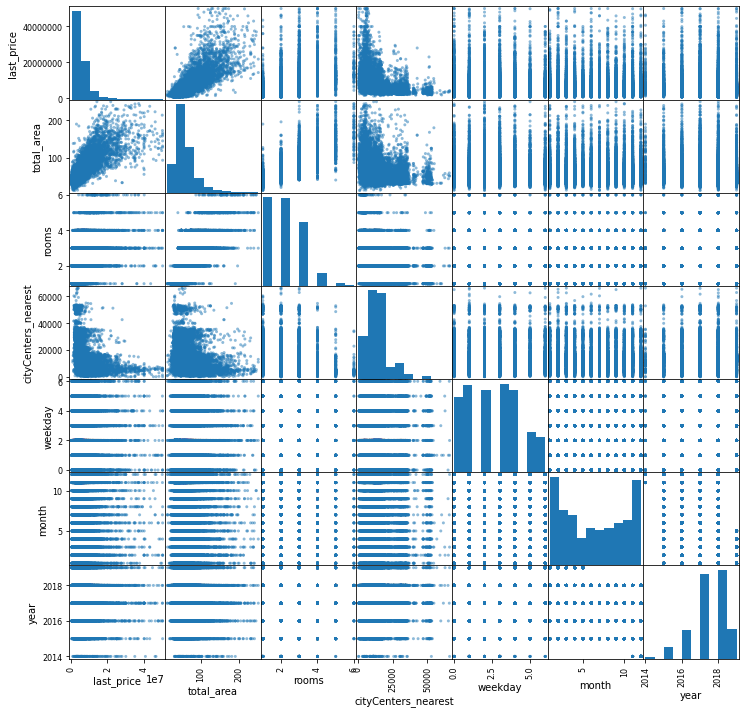

In [52]:
pd.plotting.scatter_matrix(df1, alpha = 0.5, figsize = (12,12))

Основными факторами влияющими на стоимость квартиры является общая площадь и количество комнат. Зависимость прямая. 

Отдалённость от центра доже влияет на стоимость. Чем дальше, тем меньше цена.

А вот дата почти никак не влияет на стоимость.

In [53]:
display(df.pivot_table(index='floor_place', values='last_price', aggfunc='median'))

,last_price
floor_place,
другой,4840000.0
первый,3900000.0
последний,4280000.0


<AxesSubplot:xlabel='floor_place', ylabel='last_price'>

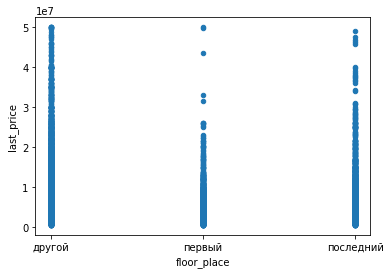

In [54]:
df.plot(x='floor_place', y='last_price', kind='scatter') 

На первых и последних этажах квартиры дешевле. Что и следовало ожидать.

Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.

In [55]:
top = df['locality_name'].value_counts().head(10).index

In [56]:
best_location = df.query('locality_name in @top')

In [57]:
best_location.pivot_table(index='locality_name', values='square_meter_price')

,square_meter_price
locality_name,
Всеволожск,68568.269037
Выборг,58093.893157
Гатчина,68757.678644
Колпино,75333.295801
Пушкин,103063.039015
Санкт-Петербург,112133.310932
деревня Кудрово,92297.218847
посёлок Мурино,85076.238902
посёлок Парголово,90448.423806


Самая высокая стоимость в Санкт-Петербурге. Замыкает десятку лидеров Всеволожск.

Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.

cityCenters_nearest — расстояние до центра города (м)

Выделяем значения. Удаляем нулевые.

Переводим в километры, округляем. В новом столбце.

In [58]:
df_spb = df.query('locality_name == "Санкт-Петербург"')

In [59]:
df_spb = df_spb.query('locality_name != 0')

In [60]:
df_spb['spb_centers_nearest'] = round(df_spb['cityCenters_nearest']/1000)

<AxesSubplot:xlabel='spb_centers_nearest'>

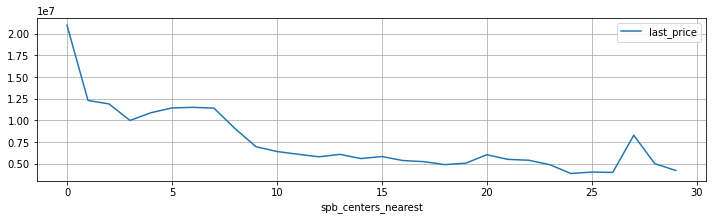

In [61]:
df_spb.pivot_table(index='spb_centers_nearest', values='last_price').plot(figsize=(12,3), grid=True)

In [62]:
display(df_spb.query('spb_centers_nearest == 27'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday,month,year,floor_place,living_total_area,kitchen_total_area,spb_centers_nearest
748,13,14350000.0,74.0,2017-11-28,2,3.13,5,30.0,3,False,False,False,25.0,0,Санкт-Петербург,23888.0,27313.0,1,1496.0,0,NaN,128.0,193918.918919,1,11,2017,другой,0.405405,0.337838,27.0
5961,6,2250000.0,32.0,2018-02-27,1,NaN,2,16.5,2,False,False,False,7.0,0,Санкт-Петербург,24006.0,27431.0,0,NaN,0,NaN,178.0,70312.500000,1,2,2018,последний,0.515625,0.218750,27.0


Выброс на 27 км. 2 квартиры.

Видно заметное снижение стоимости в районе 8-9 км. Значит это и есть радиус центральной зоны.

Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?

In [63]:
df_spb_centre = df_spb.query('spb_centers_nearest<=8')

In [64]:
df_spb_centre.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday,month,year,living_total_area,kitchen_total_area,spb_centers_nearest
count,3852.000000,3.852000e+03,3852.000000,3852.000000,2499.000000,3852.000000,3548.000000,3852.000000,3521.000000,3852.000000,3849.000000,3852.000000,3852.000000,2511.000000,3852.000000,2751.000000,3246.000000,3852.000000,3852.000000,3852.000000,3852.000000,3548.000000,3521.000000,3852.000000
mean,10.014538,1.100173e+07,81.644455,2.619678,3.024658,7.735722,47.711621,4.456646,13.457177,0.345535,25207.464536,5091.237020,0.969367,471.912784,1.263759,471.729916,237.714726,133547.619679,2.517653,6.399792,2017.197300,0.577398,0.176874,5.044912
std,5.964432,7.574235e+06,37.861684,1.146481,0.323917,4.421477,25.552057,3.260990,7.451329,0.789619,5393.115382,1983.820062,0.900155,309.012790,1.071093,265.923511,269.894699,55219.821587,1.729410,3.442834,1.117604,0.112947,0.082071,1.974732
min,0.000000,1.600000e+06,12.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,0.000000,11247.000000,181.000000,0.000000,9.000000,0.000000,22.000000,3.000000,15345.268542,0.000000,1.000000,2014.000000,0.038462,0.042810,0.000000
25%,5.000000,6.324750e+06,54.000000,2.000000,2.800000,5.000000,30.000000,2.000000,8.800000,0.000000,21727.000000,3847.000000,0.000000,288.000000,0.000000,246.000000,59.000000,99766.603656,1.000000,3.000000,2017.000000,0.511458,0.120728,4.000000
50%,10.000000,8.600000e+06,74.000000,3.000000,3.000000,6.000000,43.000000,4.000000,11.500000,0.000000,24493.000000,5026.000000,1.000000,441.000000,1.000000,454.000000,132.000000,122110.323887,3.000000,6.000000,2017.000000,0.591413,0.154446,5.000000
75%,14.000000,1.280000e+07,100.000000,3.000000,3.200000,9.000000,60.000000,5.000000,15.540000,0.000000,28501.000000,6516.000000,1.000000,595.000000,2.000000,669.000000,326.000000,150000.000000,4.000000,9.000000,2018.000000,0.658553,0.210526,7.000000
max,50.000000,5.000000e+07,245.000000,6.000000,4.000000,28.000000,184.000000,25.000000,75.000000,5.000000,44775.000000,8499.000000,3.000000,2295.000000,3.000000,1293.000000,1572.000000,848484.848485,6.000000,12.000000,2019.000000,0.983447,0.625000,8.000000


In [65]:
df_spb_centre1 = df_spb_centre.loc[:,['last_price', 'total_area', 'rooms', 'cityCenters_nearest', 'weekday', 'month', 'year']]

In [66]:
df_spb_centre1.corr()

,last_price,total_area,rooms,cityCenters_nearest,weekday,month,year
last_price,1.000000,0.715845,0.423453,-0.084130,-0.024436,-0.024380,-0.036526
total_area,0.715845,1.000000,0.786692,-0.163434,-0.022537,-0.016801,-0.096490
rooms,0.423453,0.786692,1.000000,-0.212985,-0.022741,-0.019493,-0.064843
cityCenters_nearest,-0.084130,-0.163434,-0.212985,1.000000,0.023445,-0.000364,0.047522
weekday,-0.024436,-0.022537,-0.022741,0.023445,1.000000,0.042122,0.004781
month,-0.024380,-0.016801,-0.019493,-0.000364,0.042122,1.000000,-0.238355
year,-0.036526,-0.096490,-0.064843,0.047522,0.004781,-0.238355,1.000000


array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='last_price'>,
        <AxesSubplot:xlabel='weekday', ylabel='last_price'>,
        <AxesSubplot:xlabel='month', ylabel='last_price'>,
        <AxesSubplot:xlabel='year', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='total_area'>,
        <AxesSubplot:xlabel='weekday', ylabel='total_area'>,
        <AxesSubplot:xlabel='month', ylabel='total_area'>,
        <AxesSubplot:xlabel='year', ylabel='total_area'>],
       [<AxesSubplot:xlabel='last_price', ylabel='rooms'>,
        <AxesSubplot:xlabel='total_area', ylabel='rooms'>,
    

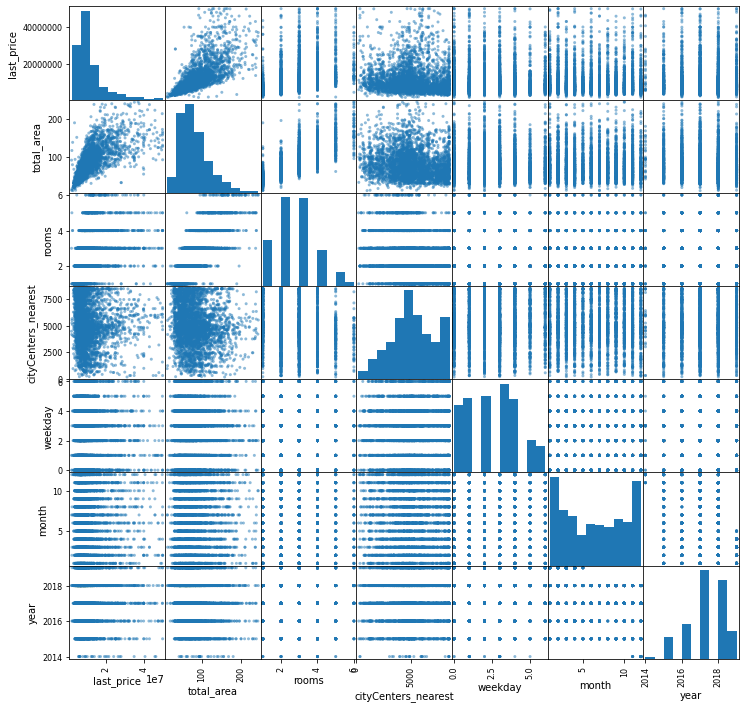

In [67]:
pd.plotting.scatter_matrix(df_spb_centre1, alpha = 0.5, figsize = (12,12))

<AxesSubplot:xlabel='floor_place', ylabel='last_price'>

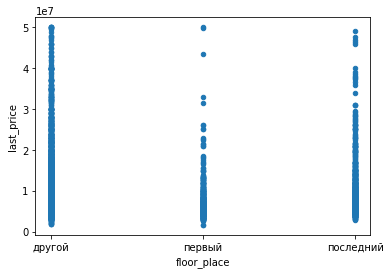

In [68]:
df_spb_centre.plot(x='floor_place', y='last_price', kind='scatter')

Основными факторами влияющими на стоимость квартиры, как и в ситуации с общими данными, является общая площадь и количество комнат. Зависимость прямая, хотя немного слабее чем в общей картине. 

Отдалённость от центра гораздо меньше влияет на стоимость.

Дата также почти никак не влияет на стоимость. 

С этажами ситуация аналогичная как и с общими данными.

Шаг 5. Напишите общий вывод

В ходе решения задачи было установлено следующее:

Общая прощадь и количество комнат (кстати, тоже взаимосвязанные факторы) имеют прямую зависимость со стоимостью квартиры.

Удаленность от центра и стоимость - обратную зависимость, причем в центральной части Санкт-Петербурга она менее выражена.

В приоритете у покупателей не первый и не последний этаж. Это тоже влияет на стоимость.

Дата, когда было размещено объявление почти не влияет на стоимость квартиры.


Считаю, что аномалиями, указывающими на деятельность мошенников может быть слишком низкий ценник на недвижимость (в моём случае квартир стоимостью менее 500000 р. было 14 штук, возможно порог цены можно поднять ещё).

Также, для недопущения аномалий можно ограничить высоту потолков. Слишком высокие потолки свидетельствуют скорее всего о том, что это нежилое (коммерческое) помещение. Это же касается площади помещения.